<a href="https://colab.research.google.com/github/ThishoniaPreethiS/python-class/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import io
from io import BytesIO
uploaded=files.upload()


Saving insurance.csv to insurance.csv


In [2]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Replacing string values to numbers
insurance['sex'] = insurance['sex'].apply({'male':0,'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [11]:
# features
X = insurance[['age', 'sex', 'bmi', 'children','smoker','region']]
# predicted variable
y = insurance['charges']

In [12]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [13]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [15]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [17]:
len(X_test) 

536

In [18]:
len(X_train) 

802

In [19]:
len(insurance)

1338

In [20]:
# importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model by passing training dataset
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Predicting the target variable for test datset
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

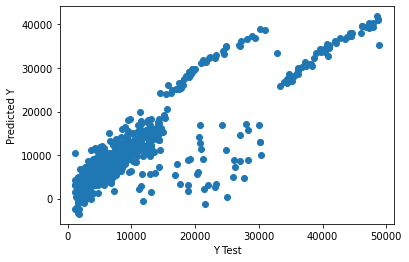

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [25]:
# Predict charges for new customer : Name- Sarah
data = {'age' : 50,
        'sex' : 1,
        'bmi' : 17.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}
index = [1]
sarah_df = pd.DataFrame(data,index)
sarah_df

,age,sex,bmi,children,smoker,region
1,50,1,17.5,4,1,2


In [26]:
prediction_sarah = model.predict(sarah_df)
print("Medical Insurance cost for Frank is : ",prediction_sarah)

Medical Insurance cost for Frank is :  [31587.53276086]
